In [57]:
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from scipy.stats import boxcox
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
from sklearn.metrics import confusion_matrix, roc_auc_score, auc, f1_score, fbeta_score, mean_squared_error
def classification_report_with_scores(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    f1 = f1_score(y_true, y_pred)
    f2 = fbeta_score(y_true, y_pred, beta=2)
    AUC = roc_auc_score(y_true, y_pred)
    cls_report = classification_report(y_true, y_pred)

    # Append additional metrics to classification report
    cls_report = f'\nAccuracy: {accuracy:.3f}' \
                 f'\nFalse Positive Rate: {fpr:.3f}' \
                 f'\nFalse Negative Rate: {fnr:.3f}' \
                 f'\nPrecision: {precision:.3f}' \
                 f'\nRecall: {recall:.3f}' \
                 f'\nRMSE:{rmse:.3f}' \
                 f'\nF1-Score:{f1:.3f}' \
                 f'\nF2-Score:{f2:.3f}' \
                 f'\nROC_AUC_Score:{AUC:.3f}' + \
                 f'\n{cls_report}'

    return cls_report

In [59]:
X_train_1=pd.read_parquet('X_train_robust_data.gzip.parquet')
X_train_2=pd.read_parquet('X_train_standard_data.gzip.parquet')
X_train_3=pd.read_parquet('X_train_min_max_data.gzip.parquet')
X_train_4=pd.read_parquet('X_train_max_abs_data.gzip.parquet')
X_train_5=pd.read_parquet('X_train_standard_data_pca.gzip.parquet')
X_train_6=pd.read_parquet('X_train_min_max_data_pca.gzip.parquet')
X_train_7=pd.read_parquet('X_train_max_abs_data_pca.gzip.parquet')

In [60]:
X_test_1=pd.read_parquet('X_test_robust_data.gzip.parquet')
X_test_2=pd.read_parquet('X_test_standard_data.gzip.parquet')
X_test_3=pd.read_parquet('X_test_min_max_data.gzip.parquet')
X_test_4=pd.read_parquet('X_test_max_abs_data.gzip.parquet')
X_test_5=pd.read_parquet('X_test_standard_data_pca.gzip.parquet')
X_test_6=pd.read_parquet('X_test_min_max_data_pca.gzip.parquet')
X_test_7=pd.read_parquet('X_test_max_abs_data_pca.gzip.parquet')

In [212]:
y_train, y_test = pd.read_parquet('y_train_data.gzip.parquet'), pd.read_parquet('y_test_data.gzip.parquet')
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

In [175]:
X_train_2_arcsinh=pd.read_parquet('X_train_standard_data_arcsinh.gzip.parquet')
X_test_2_arcsinh=pd.read_parquet('X_test_standard_data_arcsinh.gzip.parquet')

In [62]:
rfc = RandomForestClassifier(n_jobs=-1)

In [63]:
rfc.fit(X_train_1, y_train)
print(classification_report_with_scores(y_test, rfc.predict(X_test_1)))


Accuracy: 0.884
False Positive Rate: 0.075
False Negative Rate: 0.184
Precision: 0.865
Recall: 0.816
RMSE:0.340
F1-Score:0.839
F2-Score:0.825
ROC_AUC_Score:0.870
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     24811
           1       0.86      0.82      0.84     14588

    accuracy                           0.88     39399
   macro avg       0.88      0.87      0.87     39399
weighted avg       0.88      0.88      0.88     39399



In [64]:
rfc.fit(X_train_2, y_train)
print(classification_report_with_scores(y_test, rfc.predict(X_test_2)))


Accuracy: 0.886
False Positive Rate: 0.073
False Negative Rate: 0.183
Precision: 0.868
Recall: 0.817
RMSE:0.337
F1-Score:0.842
F2-Score:0.827
ROC_AUC_Score:0.872
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     24811
           1       0.87      0.82      0.84     14588

    accuracy                           0.89     39399
   macro avg       0.88      0.87      0.88     39399
weighted avg       0.89      0.89      0.89     39399



In [65]:
rfc.fit(X_train_3, y_train)
print(classification_report_with_scores(y_test, rfc.predict(X_test_3)))


Accuracy: 0.886
False Positive Rate: 0.074
False Negative Rate: 0.183
Precision: 0.867
Recall: 0.817
RMSE:0.338
F1-Score:0.841
F2-Score:0.826
ROC_AUC_Score:0.871
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     24811
           1       0.87      0.82      0.84     14588

    accuracy                           0.89     39399
   macro avg       0.88      0.87      0.88     39399
weighted avg       0.88      0.89      0.88     39399



In [66]:
rfc.fit(X_train_4, y_train)
print(classification_report_with_scores(y_test, rfc.predict(X_test_4)))


Accuracy: 0.884
False Positive Rate: 0.075
False Negative Rate: 0.186
Precision: 0.865
Recall: 0.814
RMSE:0.340
F1-Score:0.839
F2-Score:0.824
ROC_AUC_Score:0.870
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     24811
           1       0.87      0.81      0.84     14588

    accuracy                           0.88     39399
   macro avg       0.88      0.87      0.87     39399
weighted avg       0.88      0.88      0.88     39399



In [67]:
rfc.fit(X_train_5, y_train)
print(classification_report_with_scores(y_test, rfc.predict(X_test_5)))


Accuracy: 0.779
False Positive Rate: 0.128
False Negative Rate: 0.379
Precision: 0.741
Recall: 0.621
RMSE:0.470
F1-Score:0.676
F2-Score:0.642
ROC_AUC_Score:0.747
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     24811
           1       0.74      0.62      0.68     14588

    accuracy                           0.78     39399
   macro avg       0.77      0.75      0.75     39399
weighted avg       0.78      0.78      0.77     39399



In [69]:
rfc.fit(X_train_6, y_train)
print(classification_report_with_scores(y_test, rfc.predict(X_test_6)))


Accuracy: 0.672
False Positive Rate: 0.384
False Negative Rate: 0.231
Precision: 0.541
Recall: 0.769
RMSE:0.572
F1-Score:0.635
F2-Score:0.709
ROC_AUC_Score:0.692
              precision    recall  f1-score   support

           0       0.82      0.62      0.70     24811
           1       0.54      0.77      0.63     14588

    accuracy                           0.67     39399
   macro avg       0.68      0.69      0.67     39399
weighted avg       0.72      0.67      0.68     39399



In [68]:
rfc.fit(X_train_7, y_train)
print(classification_report_with_scores(y_test, rfc.predict(X_test_7)))


Accuracy: 0.620
False Positive Rate: 0.499
False Negative Rate: 0.177
Precision: 0.492
Recall: 0.823
RMSE:0.616
F1-Score:0.616
F2-Score:0.726
ROC_AUC_Score:0.662
              precision    recall  f1-score   support

           0       0.83      0.50      0.62     24811
           1       0.49      0.82      0.62     14588

    accuracy                           0.62     39399
   macro avg       0.66      0.66      0.62     39399
weighted avg       0.70      0.62      0.62     39399



In [70]:
from hyperopt import hp, fmin, Trials, STATUS_OK, tpe
from hyperopt.pyll import scope

#### The dataset with the highest base RFC Scores is the second training set which  is the standard scaled data
#### We hence try optimizing a RFC for this dataset

In [176]:
space_rf = {
    'n_estimators': scope.int(hp.uniform('n_estimators', 100, 1000)),
    'max_depth': scope.int(hp.uniform('max_depth', 1, 30)),
    'min_samples_split': scope.int(hp.uniform('min_samples_split', 1, 20)),
    'min_samples_leaf': scope.int(hp.uniform('min_samples_leaf', 1,  20)),
    'criterion': 'gini',
    'n_jobs': -1,
    'max_features': 9
}

def objective_rf(params):
    clf = RandomForestClassifier(**params)
    clf.fit(X_train_2_arcsinh, y_train)
    preds = clf.predict(X_test_2_arcsinh)
    f1 = f1_score(np.ravel(y_test), np.ravel(preds))
    print("SCORE:", f1)
    return {'loss': -f1, 'status': STATUS_OK, 'model': clf}

In [177]:
trials = Trials()
best = fmin(fn=objective_rf,
             space=space_rf,
             algo=tpe.suggest,
             max_evals=30,
             trials=trials)
print(best)

SCORE:                                                
0.614157986911236                                     
SCORE:                                                                          
0.5368052078117176                                                              
SCORE:                                                                          
0.8153530702543257                                                              
SCORE:                                                                           
0.8074754193175246                                                               
SCORE:                                                                           
0.8205109854719816                                                               
SCORE:                                                                           
0.5193700308907682                                                               
SCORE:                                                                    

In [81]:
best_model_rf = trials.best_trial['result']['model']
best_model_rf

RandomForestClassifier(max_depth=25, max_features=9, min_samples_leaf=2,
                       min_samples_split=11, n_estimators=453, n_jobs=-1)

In [167]:
best_model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 9,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 11,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 453,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [99]:
preds_1 = best_model_rf.predict(X_test_3)


Accuracy: 0.881
False Positive Rate: 0.075
False Negative Rate: 0.194
Precision: 0.864
Recall: 0.806
RMSE:0.345
F1-Score:0.834
F2-Score:0.817
ROC_AUC_Score:0.866
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     24811
           1       0.86      0.81      0.83     14588

    accuracy                           0.88     39399
   macro avg       0.88      0.87      0.87     39399
weighted avg       0.88      0.88      0.88     39399



ValueError: not enough values to unpack (expected 4, got 2)

In [100]:
print(classification_report_with_scores(y_test, preds_1))


Accuracy: 0.881
False Positive Rate: 0.075
False Negative Rate: 0.194
Precision: 0.864
Recall: 0.806
RMSE:0.345
F1-Score:0.834
F2-Score:0.817
ROC_AUC_Score:0.866
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     24811
           1       0.86      0.81      0.83     14588

    accuracy                           0.88     39399
   macro avg       0.88      0.87      0.87     39399
weighted avg       0.88      0.88      0.88     39399



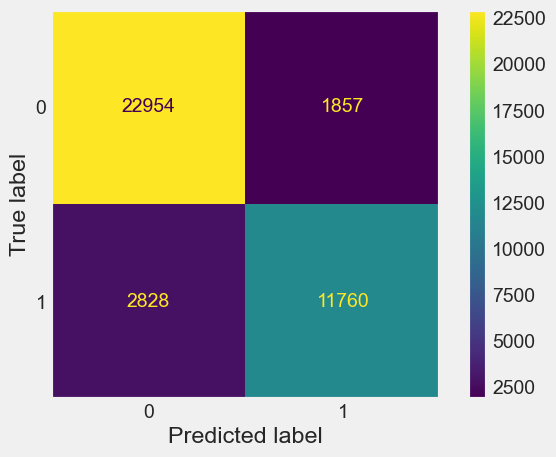

In [137]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

plt.style.use('fivethirtyeight')

cm = confusion_matrix(y_test, preds_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_rf.classes_)
disp.plot()
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(False)
plt.show()

In [196]:
data = pd.read_csv('hotel_bookings.csv')
train, test = train_test_split(data, test_size=0.33, random_state=2407)

In [197]:
train['is_canceled'] = y_train
test['is_canceled'] = preds_1

In [198]:
train = train[['is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']]
test = test[['is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']]

In [199]:
combined = pd.concat([train, test])
combined.head()

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month
88327,0,2016,April,27
94401,0,2016,July,30
110431,0,2017,April,27
45535,1,2015,November,2
44649,0,2015,October,9


In [200]:
year_format = lambda year, month, day: str(f'{day}/{month}/{year}')
combined['arrival_date'] = combined.apply(lambda x: year_format(x['arrival_date_year'], x['arrival_date_month'],
                                                                        x['arrival_date_day_of_month']), axis=1)
combined.head()

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,arrival_date
88327,0,2016,April,27,27/April/2016
94401,0,2016,July,30,30/July/2016
110431,0,2017,April,27,27/April/2017
45535,1,2015,November,2,2/November/2015
44649,0,2015,October,9,9/October/2015


In [201]:
combined['arrival_date'] = pd.to_datetime(combined['arrival_date'], format='%d/%B/%Y')

In [202]:
combined_by_day = pd.DataFrame(combined.groupby('arrival_date')['is_canceled'].sum())
combined_by_day.head()

,is_canceled
arrival_date,
2015-07-01,21
2015-07-02,55
2015-07-03,15
2015-07-04,48
2015-07-05,16


In [203]:
combined_by_day['is_canceled'].iloc[-30:]

arrival_date
2017-08-02    48
2017-08-03    63
2017-08-04    61
2017-08-05    56
2017-08-06    57
2017-08-07    77
2017-08-08    54
2017-08-09    48
2017-08-10    62
2017-08-11    54
2017-08-12    62
2017-08-13    58
2017-08-14    62
2017-08-15    60
2017-08-16    91
2017-08-17    77
2017-08-18    76
2017-08-19    79
2017-08-20    46
2017-08-21    59
2017-08-22    22
2017-08-23    37
2017-08-24    59
2017-08-25    56
2017-08-26    75
2017-08-27    49
2017-08-28    59
2017-08-29    43
2017-08-30    25
2017-08-31    45
Name: is_canceled, dtype: int64

In [204]:
np.sum(combined_by_day['is_canceled'].iloc[-30:])

1720

In [205]:
data.children = data.children.fillna(0)

In [206]:
data['total_guests'] = data.adults + data.children + data.babies

In [ ]:
train2['total_guests'] = data['total_guests']

In [ ]:
combined = pd.concat([train, test])
combined.head()

In [146]:
# now we try to use a different threshold from the 0.5 cutoff for the classifier probability
preds_1_probabilities = best_model_rf.predict_proba(X_test_3)

In [179]:
preds_1_new_threshold = preds_1_probabilities > 0.45
cancel_preds = preds_1_new_threshold[:, 1]
cancel_preds = pd.DataFrame(cancel_preds, columns=['threshold_45_preds'])

In [180]:
cancel_preds = cancel_preds.applymap(lambda x: 1 if x else 0)

In [181]:
print(classification_report_with_scores(y_test, cancel_preds.threshold_45_preds))


Accuracy: 0.879
False Positive Rate: 0.092
False Negative Rate: 0.169
Precision: 0.841
Recall: 0.831
RMSE:0.347
F1-Score:0.836
F2-Score:0.833
ROC_AUC_Score:0.869
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     24811
           1       0.84      0.83      0.84     14588

    accuracy                           0.88     39399
   macro avg       0.87      0.87      0.87     39399
weighted avg       0.88      0.88      0.88     39399



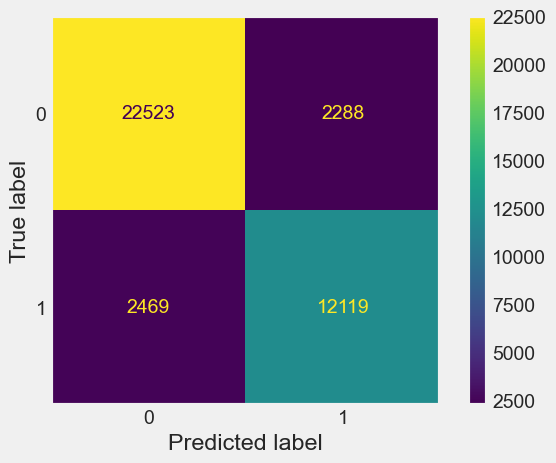

In [182]:
cm = confusion_matrix(y_test, cancel_preds.threshold_45_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_rf.classes_)
disp.plot()
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(False)
plt.show()

In [168]:
from imblearn.combine import SMOTEENN, SMOTETomek
sme = SMOTEENN(n_jobs=-1, random_state=10)
X_train_res_2, y_train_res_2 = sme.fit_resample(X_train_2, y_train)

C:\Users\fight\Documents\Anaconda3\envs\workspace2\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [169]:
best_model_rf.fit(X_train_res_2, y_train_res_2)

RandomForestClassifier(max_depth=25, max_features=9, min_samples_leaf=2,
                       min_samples_split=11, n_estimators=453, n_jobs=-1)

In [170]:
preds_2 = best_model_rf.predict(X_test_2)

In [171]:
print(classification_report_with_scores(y_test, preds_2))


Accuracy: 0.865
False Positive Rate: 0.127
False Negative Rate: 0.148
Precision: 0.797
Recall: 0.852
RMSE:0.367
F1-Score:0.824
F2-Score:0.840
ROC_AUC_Score:0.862
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     24811
           1       0.80      0.85      0.82     14588

    accuracy                           0.86     39399
   macro avg       0.85      0.86      0.86     39399
weighted avg       0.87      0.86      0.87     39399



In [173]:
best_model_rf.fit(X_train_2_arcsinh, y_train)
preds_3 = best_model_rf.predict(X_test_2_arcsinh)

In [174]:
print(classification_report_with_scores(y_test, preds_3))


Accuracy: 0.880
False Positive Rate: 0.075
False Negative Rate: 0.195
Precision: 0.863
Recall: 0.805
RMSE:0.346
F1-Score:0.833
F2-Score:0.816
ROC_AUC_Score:0.865
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     24811
           1       0.86      0.80      0.83     14588

    accuracy                           0.88     39399
   macro avg       0.88      0.86      0.87     39399
weighted avg       0.88      0.88      0.88     39399



In [92]:
best_model_copy = RandomForestClassifier(**best_model_rf.get_params())

In [93]:
selected_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
 'country', 'market_segment', 'previous_cancellations',
 'reserved_room_type', 'assigned_room_type', 'booking_changes',
 'deposit_type', 'agent', 'customer_type', 'adr',
 'required_car_parking_spaces', 'total_of_special_requests']

In [97]:
best_model_copy.fit(X_train_2[selected_features], y_train)

RandomForestClassifier(max_depth=25, max_features=9, min_samples_leaf=2,
                       min_samples_split=11, n_estimators=453, n_jobs=-1)

In [98]:
print(classification_report_with_scores(y_test, best_model_rf.predict(X_test_2)))


Accuracy: 0.765
False Positive Rate: 0.034
False Negative Rate: 0.577
Precision: 0.881
Recall: 0.423
RMSE:0.484
F1-Score:0.572
F2-Score:0.473
ROC_AUC_Score:0.695
              precision    recall  f1-score   support

           0       0.74      0.97      0.84     24811
           1       0.88      0.42      0.57     14588

    accuracy                           0.77     39399
   macro avg       0.81      0.69      0.71     39399
weighted avg       0.79      0.77      0.74     39399



In [ ]:
# using features obtained from the

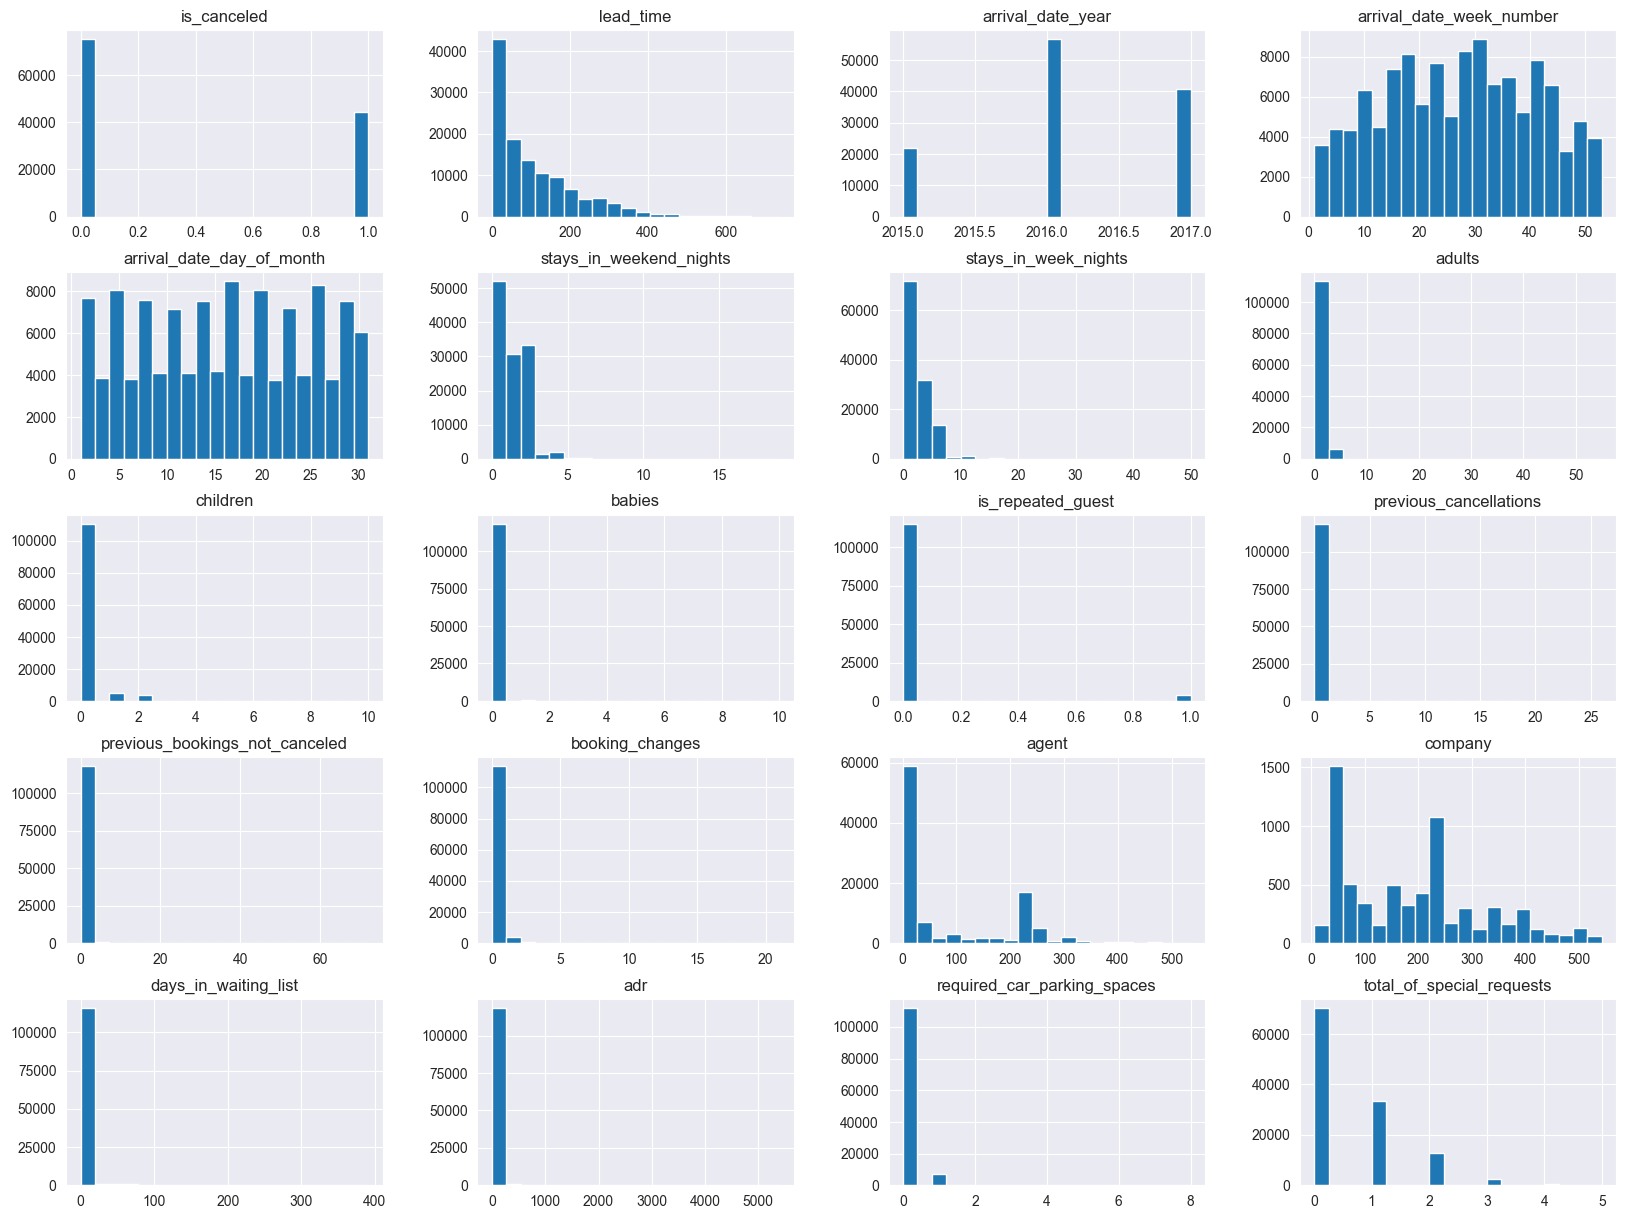

In [18]:
import matplotlib.pyplot as plt
data = pd.read_csv('hotel_bookings.csv')
data.hist(bins=20, figsize=(20,15))
plt.show()

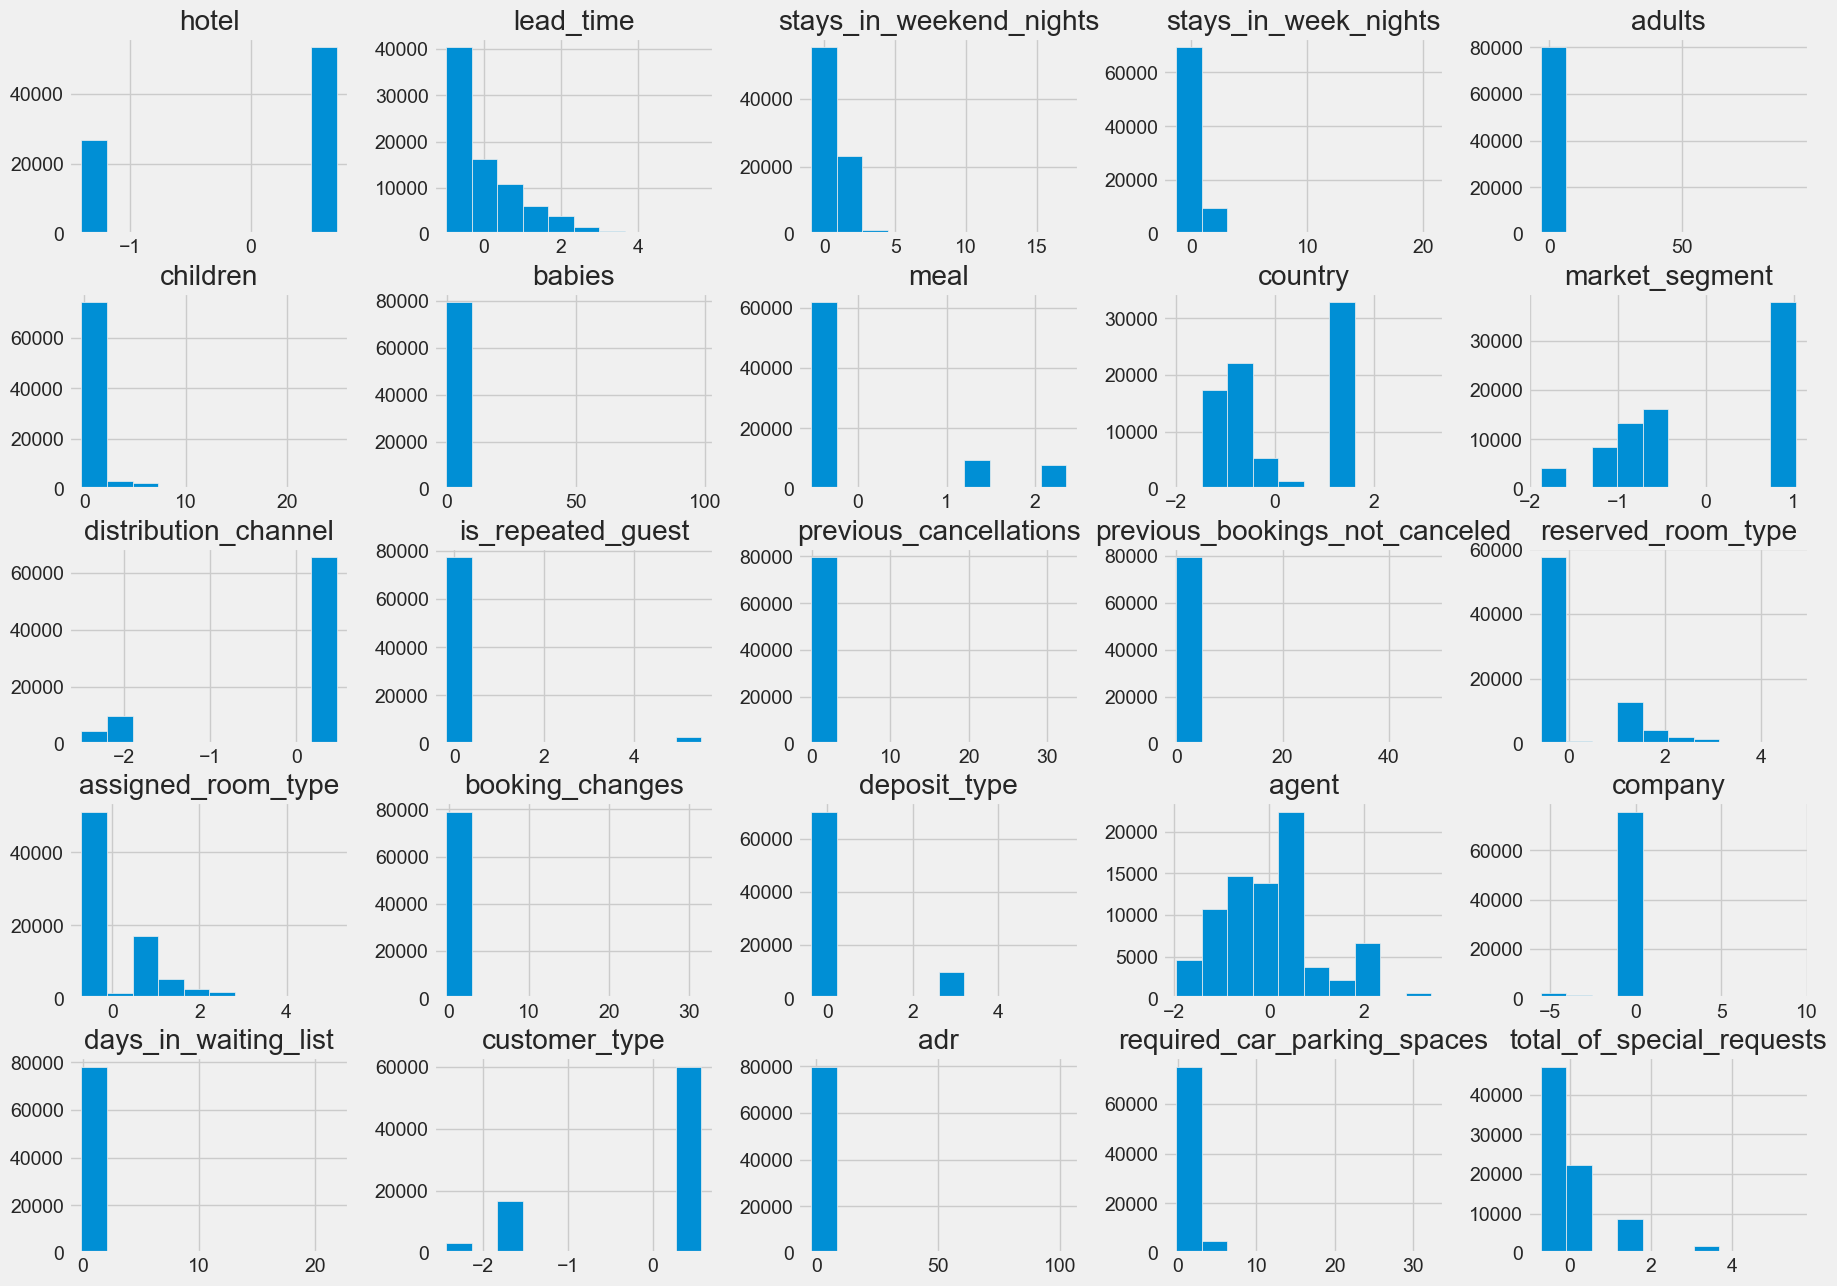

In [208]:
X_train_2.hist(bins=10, figsize=(20,15))
plt.show()

In [211]:
from sklearn.tree import export_graphviz
trees = best_model_rf.estimators_
for i in range(len(trees)):
    export_graphviz(trees[i], out_file=f'tree_{i}.dot',
                    feature_names=X_train_2.columns, class_names=['0', '1'],
                    filled=True, rounded=True, special_characters=True)

In [215]:
from sklearn.tree import DecisionTreeClassifier

In [222]:
dt = DecisionTreeClassifier()
dt.fit(X=X_train_1, y=y_train)
print(classification_report_with_scores(y_test, dt.predict(X_test_1)))


Accuracy: 0.847
False Positive Rate: 0.127
False Negative Rate: 0.198
Precision: 0.788
Recall: 0.802
RMSE:0.392
F1-Score:0.795
F2-Score:0.799
ROC_AUC_Score:0.837
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     24811
           1       0.79      0.80      0.79     14588

    accuracy                           0.85     39399
   macro avg       0.84      0.84      0.84     39399
weighted avg       0.85      0.85      0.85     39399



In [227]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(dt, out_file=None, filled=True, rounded=True, special_characters=True)

# Visualize the decision tree using Graphviz
graph = graphviz.Source(dot_data)
graph.render('decision_tree', view=True)  # Save the visualization to a file


(process:50104): GLib-GIO-WARNING **: 22:01:09.239: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.15.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:50104): GLib-GIO-WARNING **: 22:01:09.787: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2302.20.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs


'decision_tree.pdf'

In [228]:
# Hyperopt for best parameters using standardized data
space_dt = {
    'ccp_alpha': hp.quniform('ccp_alpha', 0.0, 1, 0.01),
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'min_impurity_decrease': hp.quniform('min_impurity_decrease', 0, 10, 1),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 30, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 30, 1)),
    'splitter': 'best',
    'random_state': 2407
}

def objective_dt(params):
    clf = DecisionTreeClassifier(**params)
    X_train, X_test = X_train_1, X_test_1
    y_train, y_test = pd.read_parquet('y_train_data.gzip.parquet'), pd.read_parquet('y_test_data.gzip.parquet')
    clf.fit(X_train, np.ravel(y_train))
    y_pred = clf.predict(X_test)
    rmse = mean_squared_error(y_true=np.ravel(y_test), y_pred=y_pred, squared=False)
    f1 = f1_score(y_true=np.ravel(y_test), y_pred=y_pred)
    return {'loss': -f1, 'status': STATUS_OK}

In [226]:
trials = Trials()
best = fmin(fn=objective_dt,
            space=space_dt,
            algo=tpe.suggest,
            max_evals=30,
            trials=trials)
print(best)

100%|██████████| 30/30 [00:03<00:00,  8.28trial/s, best loss: -0.48987374388044314]
{'ccp_alpha': 0.0, 'max_depth': 1.0, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 17.0, 'min_samples_split': 18.0}
